Import libraries 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

Load data

In [2]:
df = pd.read_csv('weather.csv')

In [4]:
df.head()

,Unnamed: 0,Time,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,Date
0,0,12:00 AM,61,59,94,15,0,29.77,0.0,SSE,Light Rain Shower,2021-12-1
1,1,12:23 AM,61,59,94,20,31,29.77,0.0,SSE,Light Rain Shower,2021-12-1
2,2,12:30 AM,63,59,88,24,0,29.77,0.0,S,Light Rain Shower / Windy,2021-12-1
3,3,12:34 AM,63,59,88,23,0,29.77,0.0,S,Heavy Rain Shower / Windy,2021-12-1
4,4,12:47 AM,63,59,88,22,0,29.74,0.0,S,Rain Shower / Windy,2021-12-1


In [11]:
df.Wind.unique()

array(['SSE', 'S', 'SSW', 'WSW', 'SW', 'W', 'WNW', 'NNE', 'NE', 'N', 'NW',
       'NNW', 'ENE', 'E', 'SE', 'ESE', 'VAR', 'CALM'], dtype=object)

Check for missing value

In [5]:
df.isnull().sum()

Unnamed: 0       0
Time             0
Temperature      0
Dew Point        0
Humidity         0
Wind Speed       0
Wind Gust        0
Pressure         0
Precipitation    0
Wind             0
Condition        0
Date             0
dtype: int64

In [6]:
df.shape

(1997, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1997 non-null   int64  
 1   Time           1997 non-null   object 
 2   Temperature    1997 non-null   int64  
 3   Dew Point      1997 non-null   int64  
 4   Humidity       1997 non-null   int64  
 5   Wind Speed     1997 non-null   int64  
 6   Wind Gust      1997 non-null   int64  
 7   Pressure       1997 non-null   float64
 8   Precipitation  1997 non-null   float64
 9   Wind           1997 non-null   object 
 10  Condition      1997 non-null   object 
 11  Date           1997 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 187.3+ KB


Clean data

In [3]:
pd.to_datetime(df['Date'])

0      2021-12-01
1      2021-12-01
2      2021-12-01
3      2021-12-01
4      2021-12-01
          ...    
1992   2022-05-07
1993   2022-05-07
1994   2022-05-07
1995   2022-05-07
1996   2022-05-07
Name: Date, Length: 1997, dtype: datetime64[ns]

Average values

In [9]:
print(df['Temperature'].mean())
print(df['Temperature'].min())
print(df['Temperature'].max())

50.17726589884827
28
75


In [4]:
df['Condition'].value_counts()

Condition
Fair                         858
Mostly Cloudy                528
Fair / Windy                 150
Partly Cloudy                103
Light Rain                    66
Light Rain Shower             65
Showers in the Vicinity       39
Light Rain Shower / Windy     39
Light Snow                    25
Mostly Cloudy / Windy         24
Cloudy                        19
Light Rain / Windy            19
Heavy Rain Shower / Windy     12
Rain Shower / Windy            9
Rain Shower                    8
Partly Cloudy / Windy          8
Rain                           5
Heavy Rain Shower              5
Rain / Windy                   5
T-Storm                        3
Heavy T-Storm                  2
Wintry Mix                     2
Light Rain with Thunder        2
T-Storm / Windy                1
Name: count, dtype: int64

Visualize data with matplotlib

In [11]:
monthly_temp = df.groupby(pd.PeriodIndex(df['Date'], freq="M"))['Temperature'].mean().reset_index()

In [12]:
months = ['December','Janurary','February',
         'March','April','May']

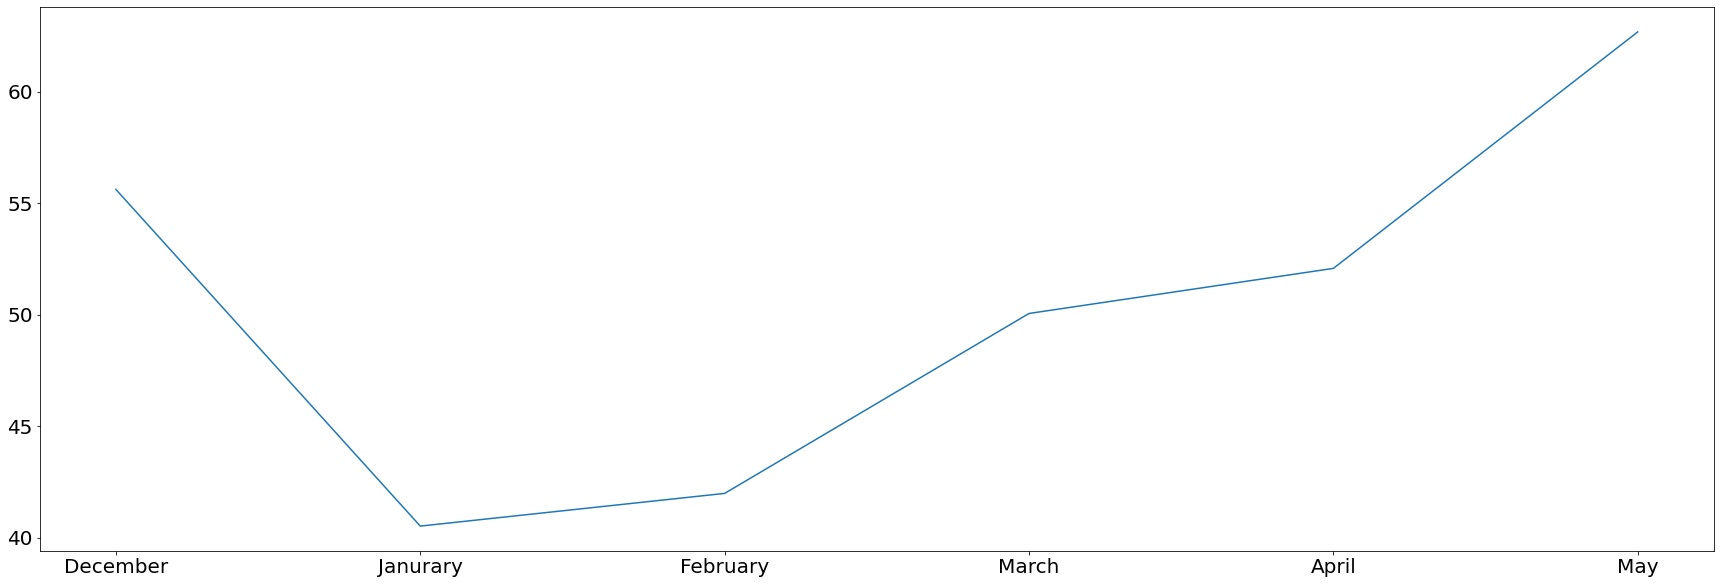

In [13]:
fig, ax=plt.subplots(1, 1, figsize=(30, 10))
ax.plot( months,  monthly_temp['Temperature'])
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.tick_params(labelsize=20, which='both')


In [14]:
temp=df.groupby('Temperature')['Condition'].value_counts().sort_values(ascending=[False]).head(10)

<AxesSubplot:xlabel='Temperature,Condition'>

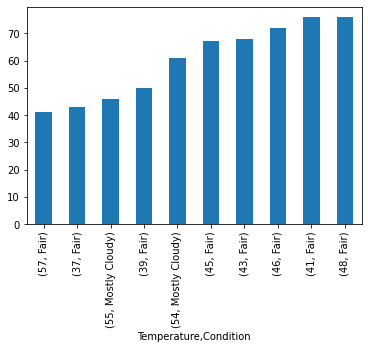

In [15]:
temp.sort_values(ascending=[True]).plot.bar()

In [6]:
rain_df = df[(df['Condition'] == 'Light Rain') | (df['Condition'] == 'Light Rain Shower / Windy')
        |(df['Condition'] == 'Rain')
        | (df['Condition'] == 'Light Rain Shower')
        |(df['Condition'] == 'Heavy Rain Shower / Windy')]   

In [17]:
rain_df['Condition'].value_counts()

Light Rain                   66
Light Rain Shower            65
Light Rain Shower / Windy    39
Heavy Rain Shower / Windy    12
Rain                          5
Name: Condition, dtype: int64

In [18]:
rain_df['Temperature'].mean()

53.17112299465241

In [19]:
rain_df['Wind Speed'].mean()

16.43850267379679

drew points tells us quanity of moisture in air

In [20]:
rain_df['Dew Point'].mean()

49.07486631016043

In [21]:
rain_df['Wind Gust'].mean()

2.3957219251336896

In [22]:
rain_df['Pressure'].mean()

30.022780748663102

In [23]:
rain_df['Wind'].value_counts()

NNW    55
N      47
S      23
NE     18
NNE     9
SSW     6
NW      6
ENE     4
SSE     4
W       4
E       3
SE      3
SW      2
ESE     1
VAR     1
WSW     1
Name: Wind, dtype: int64

In [24]:
monthly_humidity = df.groupby(pd.PeriodIndex(df['Date'], freq="M"))['Humidity'].mean().reset_index()

In [25]:
monthly_dew_point = df.groupby(pd.PeriodIndex(df['Date'], freq="M"))['Dew Point'].mean().reset_index()

Correlation between humanity and dew point

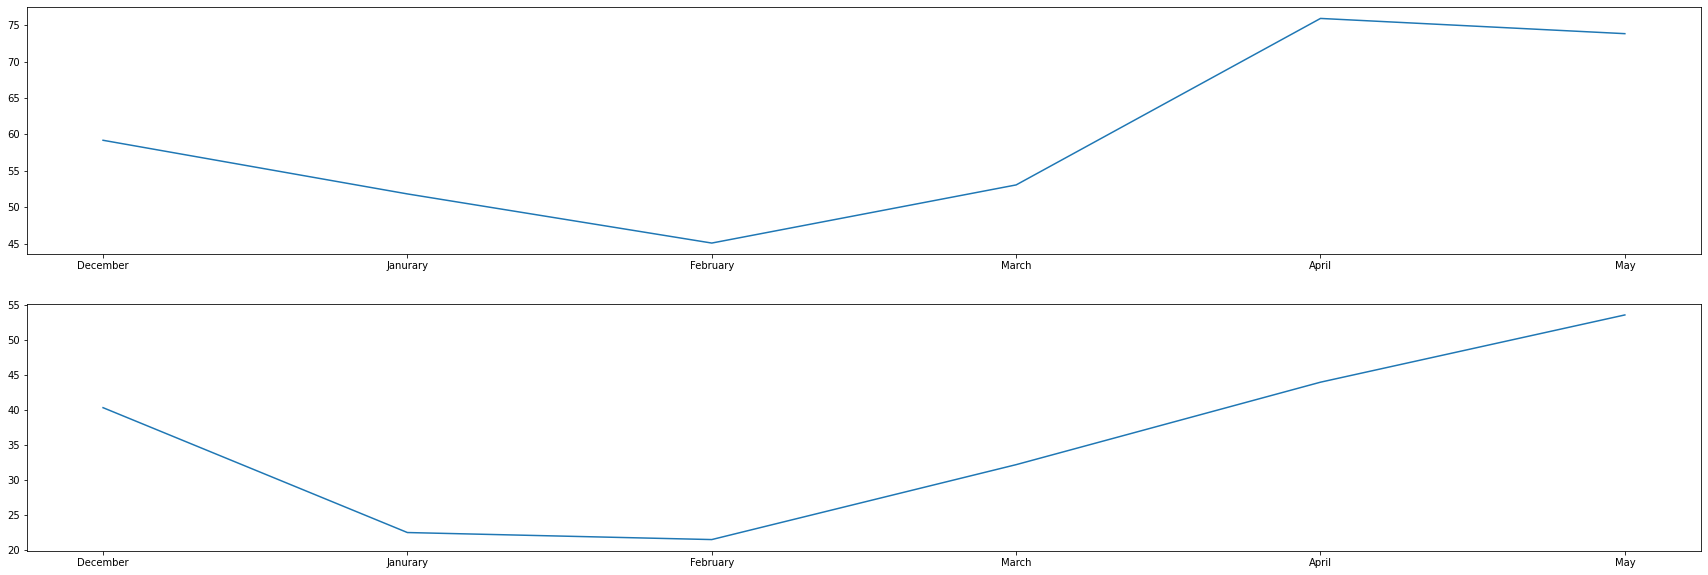

In [26]:
fig, ax=plt.subplots(2, figsize=(30, 10))
ax[0].plot( months,  monthly_humidity['Humidity'])
ax[1].plot( months,  monthly_dew_point['Dew Point'])

weather condition in warmest and coldest day

In [27]:
print(df.loc[df['Temperature'].idxmax()]['Date'])
print(df.loc[df['Temperature'].idxmin()]['Date'])

2022-5-5
2022-1-7


In [28]:
warmest_day = df.loc[df['Date'] == '2022-5-5']
coldest_day = df.loc[df['Date'] == '2022-1-7']

C:\Users\15623\AppData\Local\Temp\ipykernel_9964\694576820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warmest_day['Time'] = pd.to_datetime(warmest_day['Time'])


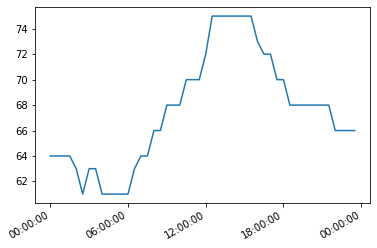

In [29]:
fig, ax = plt.subplots(1,1)
warmest_day['Time'] = pd.to_datetime(warmest_day['Time'])
ax.plot(warmest_day['Time'],warmest_day['Temperature'])
locator = mdates.HourLocator(byhour=[0,6,12,18])
ax.xaxis.set_major_locator(locator)
formatter = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(formatter)
fig.autofmt_xdate()

In [30]:
coldest_day.drop(coldest_day.tail(1).index,inplace=True)

C:\Users\15623\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C:\Users\15623\AppData\Local\Temp\ipykernel_9964\51698559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coldest_day['Time'] = pd.to_datetime(coldest_day['Time'])


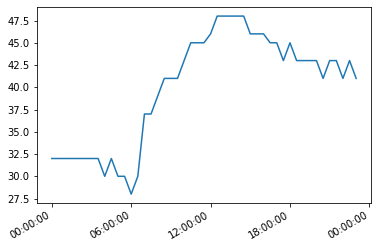

In [31]:
fig, ax = plt.subplots(1,1)
coldest_day['Time'] = pd.to_datetime(coldest_day['Time'])
ax.plot(coldest_day['Time'],coldest_day['Temperature'])
locator = mdates.HourLocator(byhour=[0,6,12,18])
ax.xaxis.set_major_locator(locator)
formatter = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(formatter)
fig.autofmt_xdate()

clean data so x and y fit

Change my mind and remove wind as it would be to complicated to work with

Clean values so there easier to categorize

In [4]:
df['Condition'] = df['Condition'].replace(['Light Rain','Light Rain Shower','Light Rain Shower / Windy',
                                           'Light Rain / Windy'],'Light Rain')

In [18]:
df['Condition'] =df['Condition'].replace(['Heavy Rain Shower / Windy','Rain Shower','Rain','Heavy Rain Shower','Rain Shower / Wind',
                                          'Rain / Windy','Rain Shower / Windy',
                                          'Showers in the Vicinity','Rain Shower / Windy'],'Rain')

In [21]:
df['Condition'] =df['Condition'].replace(['Mostly Cloudy','Partly Cloudy','Cloudy ',
                                          'Mostly Cloudy / Windy','Partly Cloudy / Windy'],'Cloudy')

In [7]:
df['Condition'] =df['Condition'].replace(['T-Storm','Heavy T-Storm','Wintry Mix',
                                          'Light Rain with Thunder',
                                          'T-Storm / Windy'],'Storm')

In [22]:
df['Condition'].value_counts()

Condition
Fair            858
Cloudy          682
Light Rain      189
Fair / Windy    150
Rain             83
Light Snow       25
Storm            10
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn import preprocessing

In [25]:
x = df.drop(["Condition","Time","Date","Unnamed: 0","Wind"], axis=1)
y=df["Condition"].values

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
x.head()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation
0,61,59,94,15,0,29.77,0.0
1,61,59,94,20,31,29.77,0.0
2,63,59,88,24,0,29.77,0.0
3,63,59,88,23,0,29.77,0.0
4,63,59,88,22,0,29.74,0.0


Testing different ml types to choose the best on from predicting

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:65.75%


RandomForest preformed the best

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print("KNN Accuracy:{:.2f}%".format(rfc.score(x_test,y_test)*100))

KNN Accuracy:76.75%


In [32]:
from sklearn.svm import SVC

In [33]:
clf=SVC()
clf.fit(x_train,y_train)
pred_clf=clf.predict(x_test)
print("KNN Accuracy:{:.2f}%".format(clf.score(x_test,y_test)*100))

KNN Accuracy:61.25%


In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train,y_train)
pred_mlpc=mlpc.predict(x_test)
print("KNN Accuracy:{:.2f}%".format(mlpc.score(x_test,y_test)*100))

KNN Accuracy:59.50%


In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print("KNN Accuracy:{:.2f}%".format(gnb.score(x_test,y_test)*100))

KNN Accuracy:60.50%


In [ ]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

In [61]:
def predict_weather():    
    temperature = input("enter temperature: ")
    Dew_Point = input("enter Dew Point:")
    Humidity = input("enter Humidity:")
    Wind_Speed = input("enter Wind Speed: ")
    Wind_Gust = input("enter Wind_Gust: ")
    Pressure = input("enter Pressure:")
    Precipitation = input("enter Precipitation: ")
    Wind = input("enter Wind:")
    weather = [[temperature, Dew_Point,Humidity,Wind_Speed,Wind_Gust,Pressure,Precipitation,Wind]]    
    output = rfc.predict(weather)
    print(output)

In [62]:
predict_weather()

enter temperature: 78
enter Dew Point:23
enter Humidity:27
enter Wind Speed: 6
enter Wind_Gust: 7
enter Pressure:8
enter Precipitation: 34
enter Wind:5
['Fair']


C:\Users\15623\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Save model to use for dashboard

In [28]:
import pickle

model = rfc.fit(x_train,y_train)

with open("model_pickle","wb") as f:
    pickle.dump(model,f)